In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv("Smartphone_Usage_Productivity_Dataset_50000.csv")

In [5]:
df.shape

(50000, 13)

In [6]:
df.info

<bound method DataFrame.info of       User_ID  Age  Gender      Occupation Device_Type  Daily_Phone_Hours  \
0          U1   58    Male    Professional     Android                1.3   
1          U2   25    Male    Professional     Android                1.2   
2          U3   19    Male         Student         iOS                5.3   
3          U4   35  Female  Business Owner         iOS                5.8   
4          U5   33    Male      Freelancer     Android                7.9   
...       ...  ...     ...             ...         ...                ...   
49995  U49996   44    Male  Business Owner     Android                5.9   
49996  U49997   42   Other  Business Owner     Android                2.9   
49997  U49998   27  Female      Freelancer         iOS                1.4   
49998  U49999   41  Female  Business Owner         iOS                8.9   
49999  U50000   46   Other      Freelancer     Android                8.8   

       Social_Media_Hours  Work_Productivit

In [7]:
print(df.head())

  User_ID  Age  Gender      Occupation Device_Type  Daily_Phone_Hours  \
0      U1   58    Male    Professional     Android                1.3   
1      U2   25    Male    Professional     Android                1.2   
2      U3   19    Male         Student         iOS                5.3   
3      U4   35  Female  Business Owner         iOS                5.8   
4      U5   33    Male      Freelancer     Android                7.9   

   Social_Media_Hours  Work_Productivity_Score  Sleep_Hours  Stress_Level  \
0                 6.7                        6          8.8             4   
1                 1.5                        5          6.4             1   
2                 5.7                        5          9.0             4   
3                 2.5                        2          5.7             3   
4                 1.3                        4          5.7             3   

   App_Usage_Count  Caffeine_Intake_Cups  Weekend_Screen_Time_Hours  
0               42          

In [8]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

In [9]:
print(df.isna().sum())

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64


In [10]:
df.duplicated().sum()

np.int64(0)

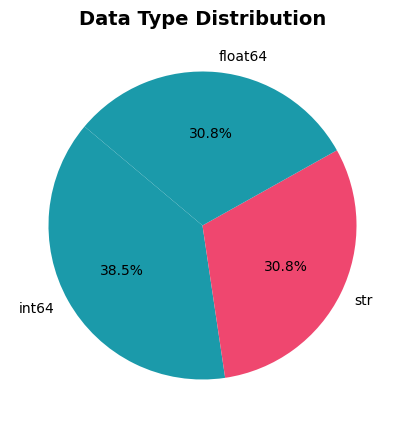

In [11]:
plt.figure(figsize=(8,5))

type_counts = df.dtypes.value_counts()

colors = ['#1B9AAA', '#EF476F']  # Teal & Pink

plt.pie(type_counts, 
        labels=type_counts.index.astype(str),
        autopct='%1.1f%%',
        colors=colors,
        startangle=140)

plt.title("Data Type Distribution", fontsize=14, fontweight='bold')
plt.show()


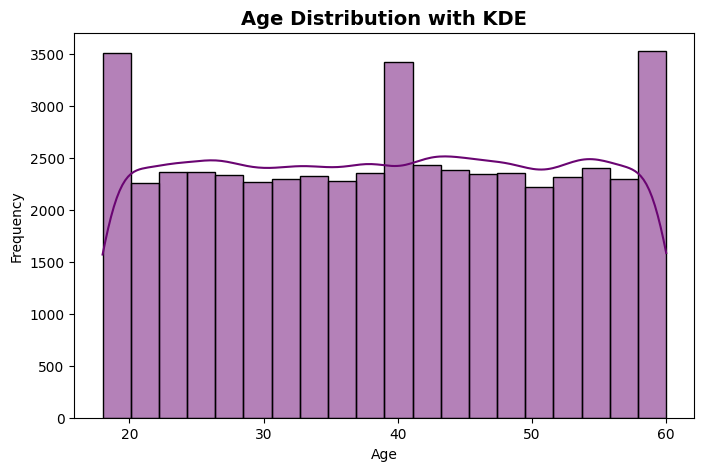

In [12]:
plt.figure(figsize=(8,5))

sns.histplot(df['Age'], 
             kde=True, 
             color='#6A0572',   # Deep Purple
             bins=20)

plt.title("Age Distribution with KDE", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


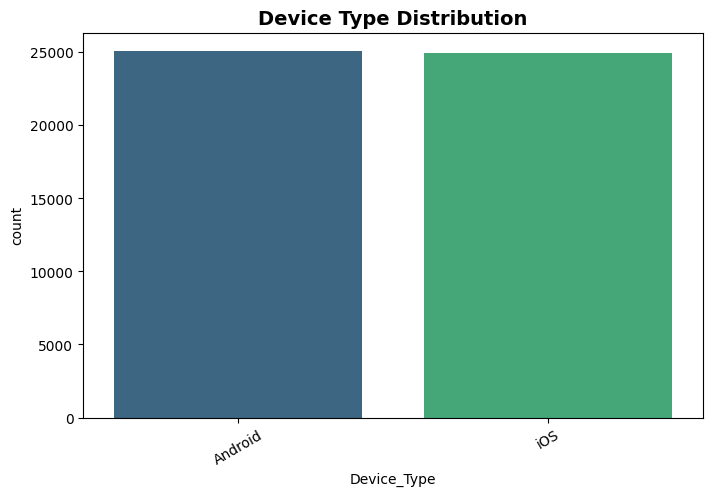

In [13]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, 
              x='Device_Type', 
              palette='viridis')

plt.title("Device Type Distribution", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.show()


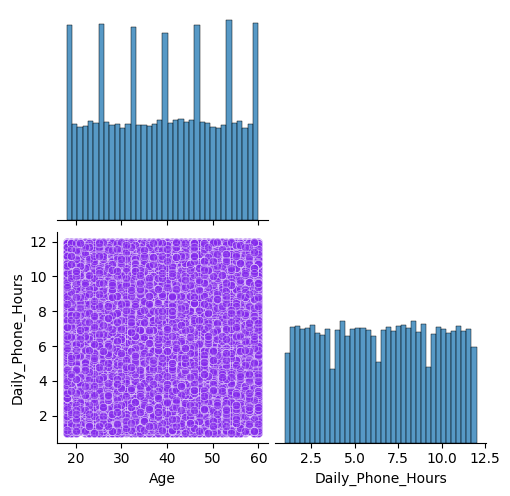

In [14]:
sns.pairplot(df[['Age',
                 'Daily_Phone_Hours',
                 ]],
             corner=True,
             plot_kws={'alpha':0.5, 'color':'#8328EC'})

plt.show()


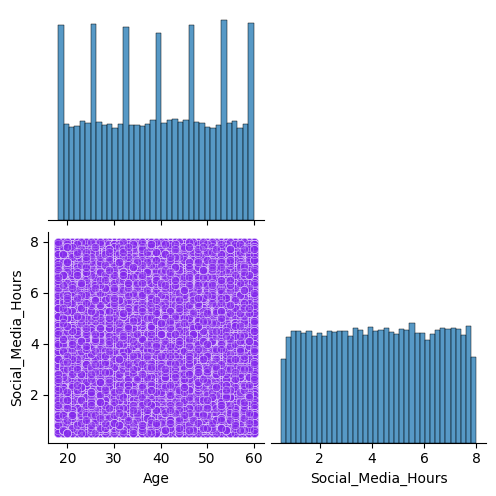

In [15]:
sns.pairplot(df[['Age',
                 'Social_Media_Hours',
                 ]],
             corner=True,
             plot_kws={'alpha':0.5, 'color':'#8328EC'})

plt.show()


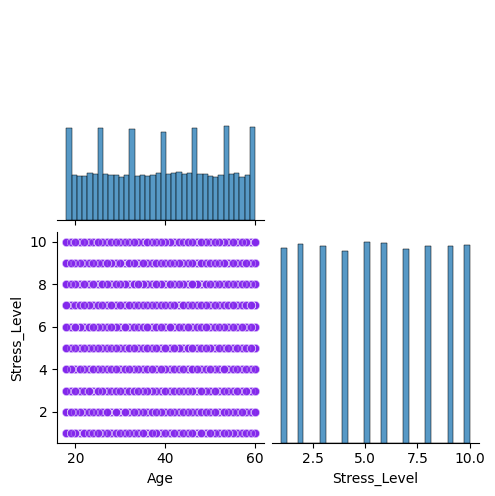

In [16]:
sns.pairplot(df[['Age',
                'Stress_Level',
                 ]],
             corner=True,
             plot_kws={'alpha':0.5, 'color':'#8328EC'})

plt.show()

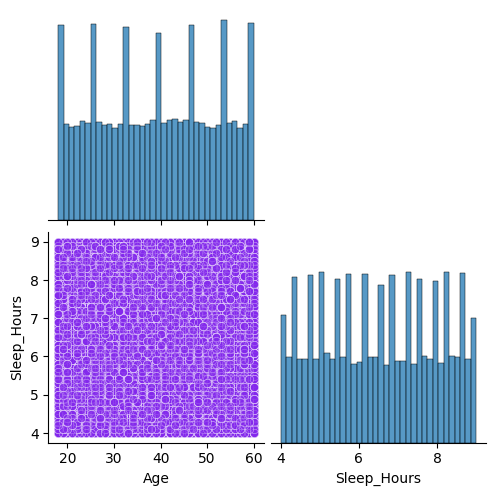

In [17]:
sns.pairplot(df[['Age',
    'Sleep_Hours',
                 ]],
             corner=True,
             plot_kws={'alpha':0.5, 'color':'#8328EC'})

plt.show()

In [18]:
cat_cols = ['Gender', 'Device_Type', 'Occupation']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [44]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree  
from sklearn.metrics import r2_score

X = df[['Age']] 
y = df['Social_Media_Hours']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = DecisionTreeRegressor(max_depth = 3)   # simple & powerful
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
y_pred




array([4.26086541, 4.18020022, 4.26086541, ..., 4.35738576, 4.30204082,
       4.26086541], shape=(10000,))

In [45]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 9.019937800380795e-05


[Text(0.5, 0.875, 'x[0] <= 20.5\nsquared_error = 4.69\nsamples = 40000\nvalue = 4.268'),
 Text(0.3, 0.625, 'x[0] <= 19.5\nsquared_error = 4.482\nsamples = 2821\nvalue = 4.35'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[0] <= 18.5\nsquared_error = 4.49\nsamples = 1891\nvalue = 4.356'),
 Text(0.1, 0.125, 'squared_error = 4.533\nsamples = 941\nvalue = 4.357'),
 Text(0.3, 0.125, 'squared_error = 4.447\nsamples = 950\nvalue = 4.354'),
 Text(0.4, 0.375, 'squared_error = 4.465\nsamples = 930\nvalue = 4.34'),
 Text(0.7, 0.625, 'x[0] <= 21.5\nsquared_error = 4.705\nsamples = 37179\nvalue = 4.262'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'squared_error = 4.6\nsamples = 899\nvalue = 4.18'),
 Text(0.8, 0.375, 'x[0] <= 24.5\nsquared_error = 4.708\nsamples = 36280\nvalue = 4.264'),
 Text(0.7, 0.125, 'squared_error = 4.636\nsamples = 2793\nvalue = 4.302'),
 Text(0.9, 0.125, 'squared_error = 4.714\nsamples = 33487\nvalue = 4.261')]

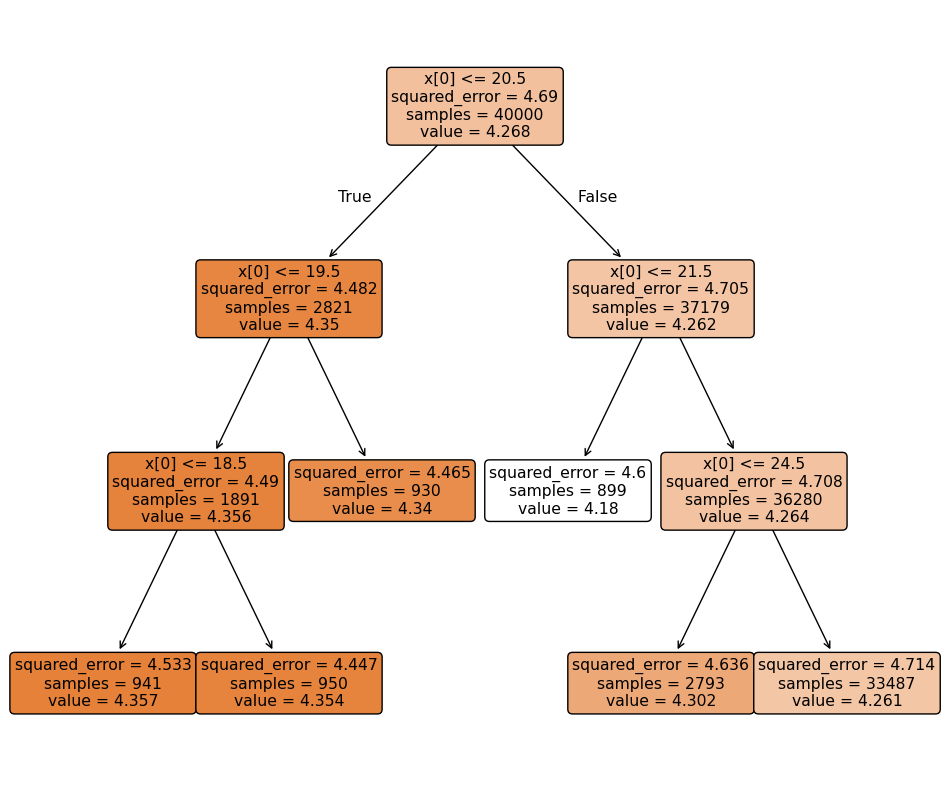

In [48]:
plt.figure(figsize = (12,10))
plot_tree(
    model,
    filled = True,
    rounded = True
)